In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.stats import linregress


def calculate_line(m,x,c):
    return np.dot(m,x) + c


def check_fit(slope, intercept, raw_domain, raw_range):
    predicted_value = calculate_line(slope, raw_domain, intercept)
    
    return (predicted_value - raw_range)**2


def check_fitness(period, mass, set_slope = False):
    period = np.array(period)
    mass = np.array(mass)
    slope, intercept,  r_value, p_value, std_err = linregress(mass,period)
    if set_slope == True:
        slope = 0
    bestfit_period = calculate_line(slope,mass,intercept)
    return np.sum(np.square(bestfit_period - period))


def update_upper_group(period, mass, group):
    """
    Creates a list of values for period and mass that belong to the upper group, defined by group number 1
    """
    upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
    upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]
    return upper_period,upper_mass

def update_lower_group(period,mass,group):
    
    
path = "d:data\Pleiades_Hartman.csv"
# path = "/home/edoodson/Documents/spin_down/data/Pleiades_Hartman.csv"

data_frame = pd.read_csv(path, encoding = "utf-8", delimiter = "\t", comment = "#")

mass = data_frame.M.tolist()
period = data_frame.Per.tolist()

data_len = int(len(mass))

# fig,ax = plt.subplots(1,figsize=(10,6))

# ax.invert_xaxis()
# ax.scatter(mass,period, marker="x")
q1 = [1,2,3,4,5]
p1 = [1,3,5,7,-9000]

check_fitness(q1,p1)


5.005553085804267

[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

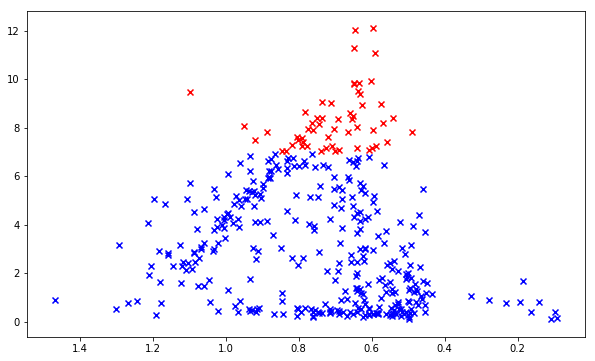

In [86]:
fake_y = calculate_line(0,mass,7)
group = [1  if period[i] >= fake_y[i] else 0  for i in range(len(period))]

fig2, ax2 = plt.subplots(1, figsize = (10,6))
ax2.invert_xaxis()
for i in range(len(fake_y)):
    if group[i] == 1:
        ax2.scatter(mass[i], period[i], color = "red", marker = "x")
    else:
        ax2.scatter(mass[i], period[i], color = "blue", marker = "x")
print(group)

-0.4417962660523342


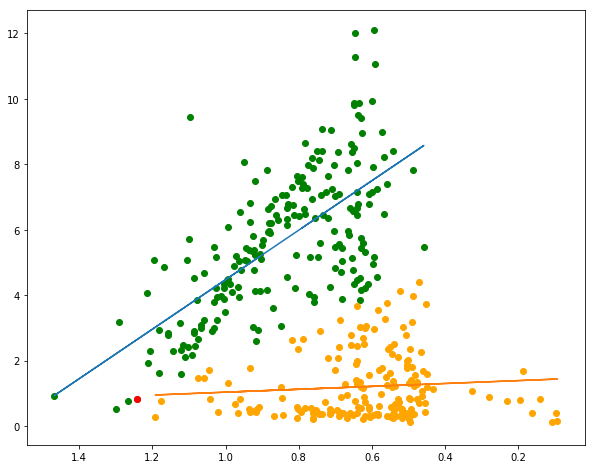

In [4]:

upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]

upper_slope, upper_intercept, _,_,_ = linregress((upper_mass,upper_period))
lower_slope, lower_intercept, _,_,_ = linregress((lower_mass,lower_period))

# fake_domain = np.linspace (1.4,0,len(upper_mass))

fake_upper_range = calculate_line(upper_slope,upper_mass,upper_intercept)
fake_lower_range = calculate_line(lower_slope, lower_mass, lower_intercept)

fig2,ax2 = plt.subplots(1, figsize = (10,8))
ax2.scatter(upper_mass,upper_period, color = "g")
ax2.scatter(lower_mass, lower_period, color = "orange")
ax2.plot(upper_mass,fake_upper_range)
ax2.plot(lower_mass,fake_lower_range)
number = 259
ax2.scatter(mass[number], period[number], color = "red")
ax2.invert_xaxis()
print(lower_slope)

In [79]:

fake_y = calculate_line(0,mass,7)
group = [1  if period[i] >= fake_y[i] else 0  for i in range(len(period))]

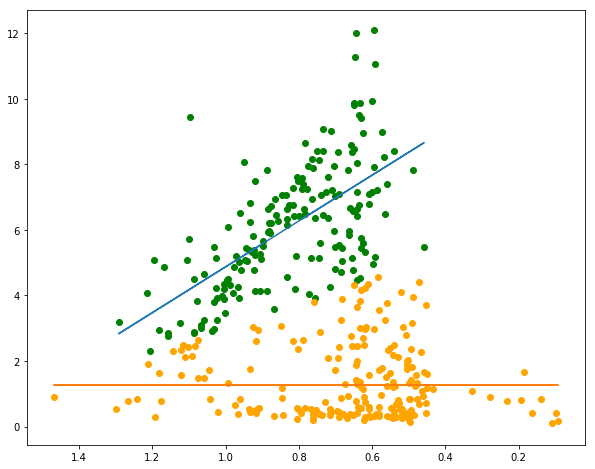

In [85]:

for l in range(1):
    for k in range(len(group)):
        upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
        upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

        lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
        lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]

        upper_fitness = check_fitness(upper_period, upper_mass)
        lower_fitness = check_fitness(lower_period, lower_mass, set_slope = True)
        
        combined_fit = upper_fitness + lower_fitness

        if group[k] == 1:
            #changes the group of the current star
            group[k] = 0
            #redefines the upper group and lower group with the star moved
            upper_period_new = [period[i] for i in range(len(group)) if group[i] == 1 ]
            upper_mass_new = [mass[i] for i in range(len(group))  if group[i] == 1 ]
            
            lower_period_new = [period[i]  for i in range(len(group)) if group[i] == 0]
            lower_mass_new = [mass[i]  for i in range(len(group)) if group[i] == 0]
            #calculates the new fitness of the new groups
            upper_fitness_new = check_fitness(upper_period_new, upper_mass_new)
            lower_fitness_new = check_fitness(lower_period_new, lower_mass_new, set_slope = True)

            combined_fit_new = upper_fitness_new + lower_fitness_new

            
            if combined_fit_new < combined_fit:
                group[k] = 0

            if combined_fit_new > combined_fit:
                group[k] = 1

        elif group[k] ==0:
            #changes the group of the current star
            group[k] = 1
            #redefines the upper group and lower group with the star moved
            upper_period_new = [period[i] for i in range(len(group)) if group[i] == 1 ]
            upper_mass_new = [mass[i] for i in range(len(group))  if group[i] == 1 ]
            
            lower_period_new = [period[i]  for i in range(len(group)) if group[i] == 0]
            lower_mass_new = [mass[i]  for i in range(len(group)) if group[i] == 0]
            
            #calculates the new fitness of the new groups
            upper_fitness_new = check_fitness(upper_period_new, upper_mass_new)
            lower_fitness_new = check_fitness(lower_period_new, lower_mass_new, set_slope = True)
            
            combined_fit_new = upper_fitness_new + lower_fitness_new
            
            if combined_fit_new < combined_fit:
                group[k] = 1
            if combined_fit_new > combined_fit:
                group[k] = 0
                

upper_period = [period[i] for i in range(len(group)) if group[i] == 1 ]
upper_mass = [mass[i] for i in range(len(group))  if group[i] == 1 ]

lower_period = [period[i]  for i in range(len(group)) if group[i] == 0]
lower_mass = [mass[i]  for i in range(len(group)) if group[i] == 0]



fig3,ax3 = plt.subplots(1, figsize = (10,8))
ax3.scatter(upper_mass,upper_period, color = "g")
ax3.scatter(lower_mass, lower_period, color = "orange")

ax3.plot(upper_mass,calculate_line(linregress(upper_mass,upper_period)[0],upper_mass,linregress(upper_mass,upper_period)[1]  ))
ax3.plot(lower_mass,calculate_line(0,lower_mass,linregress(lower_mass,lower_period)[1]  ))
# ax3.plot(lower_mass,fake_lower_range)
ax3.invert_xaxis()

        
        
    
    

In [70]:
for a,(b,c) in enumerate(zip(mass,period)):
    print(a,b,c)


0 0.7909999999999999 7.26243656
1 0.7829999999999999 6.48431835
2 0.7020000000000001 4.81593936
3 0.64 8.03366876
4 0.551 2.41116752
5 0.7559999999999999 6.37055838
6 1.022 3.24215918
7 0.655 8.36686239
8 0.693 2.08690706
9 0.735 9.07804569
10 0.846 7.064627
11 0.54 2.49739909
12 0.988 4.33319604
13 0.478 0.82753379
14 0.537 1.22676293
15 0.562 1.50923453
16 1.005 4.21255021
17 0.485 0.36626367
18 0.517 0.38903131
19 0.965 4.25201204
20 0.45399999999999996 0.71172448
21 0.647 11.2770754
22 0.7879999999999999 7.41064955
23 0.65 8.48415486
24 0.498 0.20799738
25 0.778 7.26243656
26 0.5870000000000001 7.23350255
27 0.596 0.32462169
28 0.581 1.7258642
29 0.665 7.82590146
30 1.1440000000000001 2.29533393
31 0.56 3.76682394
32 0.7120000000000001 0.43940202
33 0.637 6.77466097
34 1.031 2.98619924
35 0.7 1.7258642
36 0.527 0.72479407
37 1.074 2.64666055
38 0.64 4.47194369
39 0.897 5.67377856
40 0.45 1.18822588
41 0.624 2.70582584
42 0.434 1.13831294
43 0.5489999999999999 0.27855311
44 1.267000